In [24]:
from transformers import AutoImageProcessor, ViTMAEModel
from PIL import Image
import requests

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

image_processor = AutoImageProcessor.from_pretrained("facebook/vit-mae-base")
model = ViTMAEModel.from_pretrained("facebook/vit-mae-base")

inputs = image_processor(images=image, return_tensors="pt")
outputs = model(**inputs)
last_hidden_states = outputs.last_hidden_state

c:\Users\Anantha\miniconda3\envs\videomae\lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [32]:
outputs.last_hidden_state.shape  # (batch_size, sequence_length, hidden_size)
# torch.Size([1, 197, 768])

torch.Size([1, 50, 768])

In [47]:
outputs

ViTMAEModelOutput(last_hidden_state=tensor([[[-0.0957, -0.0058,  0.1527,  ..., -0.1270, -0.3553,  0.1016],
         [-0.5306, -0.2959, -0.4676,  ...,  0.0732, -0.0414, -0.5892],
         [ 0.5623,  0.1642, -0.2690,  ..., -0.2593, -0.1840, -0.8850],
         ...,
         [-0.6489,  0.1791, -0.1170,  ...,  0.1611, -0.4299, -0.5702],
         [ 0.8465, -0.1084,  0.0716,  ...,  0.5138, -0.0249, -0.4487],
         [ 0.2686, -0.0475,  0.1347,  ..., -0.0470, -0.0176, -0.3409]]],
       grad_fn=<NativeLayerNormBackward0>), mask=tensor([[0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1.,
         1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
         0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
         1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
         1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
         0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,

In [ ]:
model

ViTMAEModel(
  (embeddings): ViTMAEEmbeddings(
    (patch_embeddings): ViTMAEPatchEmbeddings(
      (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
  )
  (encoder): ViTMAEEncoder(
    (layer): ModuleList(
      (0-11): 12 x ViTMAELayer(
        (attention): ViTMAEAttention(
          (attention): ViTMAESelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
          (output): ViTMAESelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
        )
        (intermediate): ViTMAEIntermediate(
          (dense): Linear(in_features=768, out_features=3072, bias=True)
          (intermediate_act_fn): GELUActivation()
        )
      

In [39]:
pp = outputs.mask

In [43]:
pp[pp == 0].shape

torch.Size([49])

In [8]:
outputs

ViTMAEModelOutput(last_hidden_state=tensor([[[-0.1073, -0.0063,  0.1761,  ..., -0.1533, -0.3554,  0.1533],
         [-0.2072,  0.1084,  0.3549,  ..., -0.0638, -0.0686,  0.6657],
         [ 0.8249, -0.0816,  0.1075,  ..., -0.1963, -0.0047, -0.6094],
         ...,
         [-0.5702, -0.0625, -0.2955,  ..., -0.3849, -0.0472, -0.4356],
         [-0.4320,  0.2308, -0.1360,  ..., -0.2542, -0.2877, -0.0518],
         [-0.8464, -0.2729, -0.3271,  ..., -0.0684, -0.0546,  0.7371]]],
       grad_fn=<NativeLayerNormBackward0>), mask=tensor([[1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
         0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1.,
         1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
         0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0.,

In [9]:
from transformers import AutoImageProcessor, ViTMAEForPreTraining
from PIL import Image
import requests

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

image_processor = AutoImageProcessor.from_pretrained("facebook/vit-mae-base")
model = ViTMAEForPreTraining.from_pretrained("facebook/vit-mae-base")

inputs = image_processor(images=image, return_tensors="pt")
outputs = model(**inputs)
loss = outputs.loss
mask = outputs.mask
ids_restore = outputs.ids_restore

In [22]:
outputs.logits.shape

torch.Size([1, 196, 768])

In [ ]:
outputs 

ViTMAEForPreTrainingOutput(loss=tensor(0.3278, grad_fn=<DivBackward0>), logits=tensor([[[ 0.7954, -1.2572, -0.2052,  ...,  0.5138, -1.5159, -0.5236],
         [ 0.9194, -1.2806, -0.1921,  ...,  0.5027, -1.5141, -0.5677],
         [ 0.9309, -1.3067, -0.2540,  ...,  0.2835, -1.5924, -0.7273],
         ...,
         [ 1.9292, -0.6351,  1.2033,  ...,  1.7233, -0.8018,  1.1064],
         [ 1.6205, -0.9004,  0.8903,  ...,  1.4316, -1.0763,  0.7786],
         [ 1.1903, -1.3620,  0.1992,  ...,  1.4870, -0.6740,  1.1569]]],
       grad_fn=<SliceBackward0>), mask=tensor([[1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
         1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
         1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
         1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
         1., 1., 1., 1., 1., 1., 1.

In [18]:
mask.shape, ids_restore.shape, loss
# The output will show the shape of the mask, ids_restore, and the loss value.

(torch.Size([1, 196]),
 torch.Size([1, 196]),
 tensor(0.3278, grad_fn=<DivBackward0>))

In [86]:
from transformers import AutoFeatureExtractor, AutoModel, ViTMAEForPreTraining, ViTImageProcessor
from PIL import Image
import torch
import os

# 1. Load your trained model checkpoint
model_name_or_path = "D:/SAM/Sem8/Capstone_Final_Project/transformers/examples/pytorch/image-pretraining/outputs/checkpoint-500"  # path to your checkpoint
model = ViTMAEForPreTraining.from_pretrained(model_name_or_path, mask_ratio=0)
feature_extractor = ViTImageProcessor.from_pretrained(model_name_or_path)

model.eval()  

image_path = "D:/SAM/Sem8/Capstone_Final_Project/dash_frames_single_user/train/Dashboard_user_id_14786_5_385.jpg"
image = Image.open(image_path).convert("RGB")
inputs = feature_extractor(images=image, return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)
    embeddings = outputs.logits


In [ ]:
from transformers import ViTMAEForPreTraining, ViTImageProcessor
from PIL import Image
import torch
import cv2  

model_name_or_path = "D:/SAM/Sem8/Capstone_Final_Project/transformers/examples/pytorch/image-pretraining/outputs/checkpoint-500"  # path to your checkpoint
model = ViTMAEForPreTraining.from_pretrained(model_name_or_path, mask_ratio=0)
feature_extractor = ViTImageProcessor.from_pretrained(model_name_or_path)

model.eval()  

video_path = "your_video.mp4"
cap = cv2.VideoCapture(video_path)

frames = []
frame_count = 0
max_frames = 15
while frame_count < max_frames:
    ret, frame = cap.read()
    if not ret:
        break
    # Convert BGR (OpenCV) to RGB and then to PIL Image
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    pil_img = Image.fromarray(frame_rgb)
    frames.append(pil_img)
    frame_count += 1
cap.release()

# Get CLS embeddings for each frame
cls_embeddings = []
with torch.no_grad():
    for img in frames:
        inputs = feature_extractor(images=img, return_tensors="pt")
        outputs = model(**inputs)
        embeddings = outputs.logits
        cls_embeddings.append(embeddings)

# Concatenate embeddings: shape [15, hidden_dim]
video_embedding = torch.cat(cls_embeddings, dim=0)  # or dim=1 if you want [1, 15*hidden_dim]

# outputs = model(**inputs)
# embeddings = outputs.last_hidden_state  # shape: [1, num_patches+1, hidden_dim]
# cls_emb = embeddings[:, 0, :]  # CLS token embedding shape: [1, hidden_dim]
        
print(video_embedding.shape)

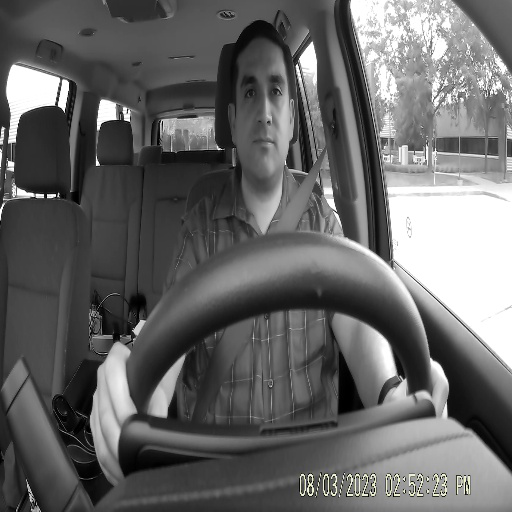

In [5]:
image

In [87]:
embeddings.shape  # Should be (batch_size, sequence_length, hidden_size)

torch.Size([1, 196, 768])

In [68]:
embeddings[:, 1:, :] 

tensor([[[ 0.8196, -2.1788, -0.5382,  ..., -0.6615, -1.6897,  0.3352],
         [ 1.0873, -1.6641, -0.7354,  ..., -0.5757, -1.4252,  0.5837],
         [ 0.7700, -1.7399, -0.6434,  ..., -0.5836, -1.4624,  0.3890],
         ...,
         [ 1.4601, -1.8062, -0.5182,  ..., -0.5972, -1.2996,  0.4398],
         [ 1.3528, -1.5969, -0.5159,  ..., -0.5464, -1.2452,  0.3435],
         [ 0.9866, -1.9194, -0.5144,  ..., -0.5373, -1.2678,  0.3786]]])

In [52]:
embeddings[:, 1:, :] 

tensor([[[ 1.4980, -1.9202, -0.4528,  ..., -0.6402, -1.3731,  0.3623],
         [ 0.5296, -2.1108, -0.5046,  ..., -0.5668, -1.6216,  0.5202],
         [ 0.4628, -2.1724, -0.8897,  ..., -0.6425, -1.5342,  0.3399],
         ...,
         [ 0.8754, -1.8583, -0.4974,  ..., -0.6501, -1.3626,  0.2843],
         [ 1.4359, -2.0786, -0.6643,  ..., -0.6239, -1.2323,  0.4636],
         [ 1.2921, -2.0327, -0.3926,  ..., -0.5997, -1.3970,  0.3966]]])

In [88]:
embeddings

tensor([[[-1.1329, -0.9360, -0.7473,  ...,  0.0613,  0.0507,  0.9857],
         [-1.1142, -0.9405, -0.7686,  ...,  0.0287,  0.0638,  0.9749],
         [-1.1172, -0.9457, -0.7597,  ...,  0.0336,  0.0587,  0.9794],
         ...,
         [-1.0967, -0.9446, -0.7017,  ...,  0.0185,  0.0906,  0.9692],
         [-1.1055, -0.9478, -0.7012,  ...,  0.0118,  0.0859,  0.9742],
         [-1.1085, -0.9396, -0.6971,  ...,  0.0037,  0.0758,  0.9741]]])

In [83]:
embeddings

tensor([[[-1.1329, -0.9360, -0.7473,  ...,  0.0613,  0.0507,  0.9857],
         [-1.1142, -0.9405, -0.7686,  ...,  0.0287,  0.0638,  0.9749],
         [-1.1172, -0.9457, -0.7597,  ...,  0.0336,  0.0587,  0.9794],
         ...,
         [-1.0967, -0.9446, -0.7017,  ...,  0.0185,  0.0906,  0.9692],
         [-1.1055, -0.9478, -0.7012,  ...,  0.0118,  0.0859,  0.9742],
         [-1.1085, -0.9396, -0.6971,  ...,  0.0037,  0.0758,  0.9741]]])

In [ ]:
embeddings

tensor([[[ 1.1217, -2.0656, -0.7526,  ..., -0.5530, -1.4376,  0.4882],
         [ 1.2704, -1.9974, -0.7164,  ..., -0.5688, -1.3881,  0.5061],
         [ 0.2846, -2.1586, -0.8541,  ..., -0.7716, -1.4655,  0.3508],
         ...,
         [ 0.3341, -2.0415, -0.9112,  ..., -0.7747, -1.5327,  0.3728],
         [ 1.5509, -1.6865, -0.4200,  ..., -0.6684, -1.3348,  0.4219],
         [ 1.0357, -1.9699, -0.7070,  ..., -0.6352, -1.4432,  0.4333]]])

In [82]:
from transformers import AutoFeatureExtractor, ViTMAEModel
model_name_or_path = "D:/SAM/Sem8/Capstone_Final_Project/transformers/examples/pytorch/image-pretraining/outputs/checkpoint-500"  # path to your checkpoint
model = ViTMAEForPreTraining.from_pretrained(model_name_or_path, mask_ratio=0)
feature_extractor =  ViTImageProcessor.from_pretrained(model_name_or_path)

model.eval()  

image_path = "D:/SAM/Sem8/Capstone_Final_Project/dash_frames_single_user/train/Dashboard_user_id_14786_5_385.jpg"
image = Image.open(image_path).convert("RGB")
inputs = feature_extractor(images=image, return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)
    embeddings = outputs.logits

In [8]:
embeddings.shape

torch.Size([1, 50, 768])

In [13]:
pp = outputs.mask

In [15]:
pp[pp == 1].shape

torch.Size([147])

In [9]:
embeddings[0]

tensor([[ 1.0453, -1.9011, -0.5217,  ..., -0.5833, -1.3647,  0.4194],
        [ 0.2473, -2.1490, -0.8814,  ..., -0.7275, -1.4528,  0.3557],
        [ 0.5912, -2.0202, -0.9059,  ..., -0.7643, -1.3932,  0.4414],
        ...,
        [ 0.6011, -2.1171, -0.8928,  ..., -0.7372, -1.4981,  0.3903],
        [ 1.2458, -1.8231, -0.7719,  ..., -0.5990, -1.3131,  0.4221],
        [ 0.8684, -1.9634, -0.8695,  ..., -0.4973, -1.5899,  0.5060]])

In [10]:
embeddings[1]

IndexError: index 1 is out of bounds for dimension 0 with size 1

In [5]:
outputs

array([[-0.13023907,  0.05817458,  0.13541254, ..., -0.14310925,
        -0.33351707,  0.14026898],
       [-0.30484024,  0.08041191,  0.10124198, ..., -0.35951227,
        -0.02400254,  0.47153097],
       [ 0.32005274,  0.02926075, -0.14343977, ..., -0.10514118,
        -0.22821188, -0.61752427],
       ...,
       [ 1.0040077 , -0.06337875,  0.60712636, ..., -0.21098472,
        -0.35868436,  0.1922133 ],
       [ 0.7689231 , -0.02881274,  0.2473605 , ..., -0.21278928,
        -0.20738071, -0.7112396 ],
       [ 0.1907663 ,  0.04487446,  0.20406446, ..., -0.02868564,
        -0.2728596 , -0.27877694]], dtype=float32)

In [3]:
import logging
import os
import sys
from dataclasses import dataclass, field
from typing import Optional

import torch
from datasets import load_dataset
from torchvision.transforms import Compose, Lambda, Normalize, RandomHorizontalFlip, RandomResizedCrop, ToTensor
from torchvision.transforms.functional import InterpolationMode

import transformers
from transformers import (
    HfArgumentParser,
    Trainer,
    TrainingArguments,
    ViTImageProcessor,
    ViTMAEConfig,
    ViTMAEForPreTraining,
)
from transformers.trainer_utils import get_last_checkpoint
from transformers.utils import check_min_version, send_example_telemetry
from transformers.utils.versions import require_version



c:\Users\Anantha\miniconda3\envs\videomae\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Anantha\miniconda3\envs\videomae\lib\site-packages\transformers\utils\generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
c:\Users\Anantha\miniconda3\envs\videomae\lib\site-packages\transformers\utils\generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(


In [2]:
!pip install datasets

  Using cached dill-0.3.8-py3-none-any.whl.metadata (10 kB)
  Using cached aiosignal-1.3.1-py3-none-any.whl.metadata (4.0 kB)
Using cached dill-0.3.8-py3-none-any.whl (116 kB)
   ---------------------------------------- 0.0/25.2 MB ? eta -:--:--
   - -------------------------------------- 0.8/25.2 MB 5.6 MB/s eta 0:00:05
   --- ------------------------------------ 2.4/25.2 MB 5.8 MB/s eta 0:00:04
   ----- ---------------------------------- 3.7/25.2 MB 6.1 MB/s eta 0:00:04
   ------- -------------------------------- 5.0/25.2 MB 6.0 MB/s eta 0:00:04
   ---------- ----------------------------- 6.6/25.2 MB 6.3 MB/s eta 0:00:03
   ------------- -------------------------- 8.4/25.2 MB 6.7 MB/s eta 0:00:03
   ---------------- ----------------------- 10.2/25.2 MB 6.9 MB/s eta 0:00:03
   ------------------ --------------------- 11.5/25.2 MB 6.8 MB/s eta 0:00:03
   -------------------- ------------------- 12.8/25.2 MB 6.7 MB/s eta 0:00:02
   ---------------------- ----------------- 14.4/25.2 MB 6

In [ ]:
python run_mae.py
    --model_type vit_mae
    --dataset_name distracted_driver
    --train_dir D:/SAM/Sem-8/Capstone_Final_Project/dash_frames_single_user
    --model_name_or_path facebook/vit-mae-base
    --output_dir ./outputs/
    --remove_unused_columns False
    --label_names pixel_values
    --do_train
    --do_eval

In [6]:
196*768*15

2257920

In [5]:
2048 * 15

30720

In [ ]:
2048 * 15
196 768

In [ ]:

    --validation_dir D:/SAM/Sem-8/Capstone_Final_Project/dash_frames_single_user \

In [ ]:
python run_mae.py \  --dataset_name \  D:/SAM/Sem-8/Capstone_Final_Project/dash_frames_single_user \   --train_dir \  "D:/SAM/Sem-8/Capstone_Final_Project/dash_frames_single_user/train/*" \   --output_dir \ ./outputs/ \   --remove_unused_columns False \   --label_names \ pixel_values \   --do_train \  --do_eval